--- Generated Data (y = 3/2x + 1/3) ---
      x       y
0    -3   -25/6
1  -5/2  -41/12
2    -2    -8/3
3  -3/2  -23/12
4    -1    -7/6
...
       x       y
32    13   119/6
33  27/2  247/12
34    14    64/3
35  29/2  265/12
36    15   137/6


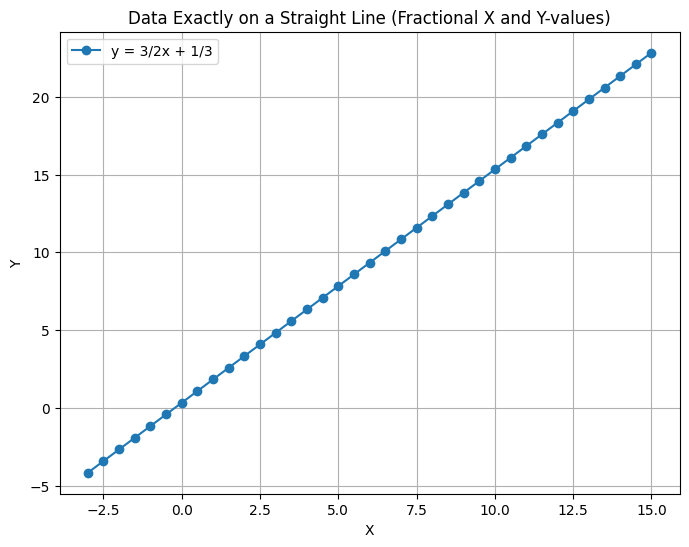

In [28]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from sympy import Matrix, Rational

def generate_perfect_line_data(m: Rational, c: Rational, x_start: Rational, x_end: Rational, x_step: Rational) -> pd.DataFrame:
    # 1. Generate fractional x values from x_start to x_end (inclusive) with x_step
    x_values = []
    current_x = x_start
    while current_x <= x_end:
        x_values.append(current_x)
        current_x += x_step

    # 2. Calculate the corresponding y values exactly using Rational numbers
    y_values = [m * x + c for x in x_values]

    # 3. Return the data in a pandas DataFrame for easy viewing
    data = pd.DataFrame({
        'x': x_values,
        'y': y_values
    })

    return data

# --- Example Usage ---
# Define the line parameters using Rational numbers: y = (3/2)x + (1/3)
slope = Rational(3, 2)
intercept = Rational(1, 3)

# Define the data range and step using Rational numbers
start_x = Rational(-3, 1) # -3
end_x = Rational(15, 1)   # 15
x_step = Rational(1, 2)   # 0.5
p=3
# Generate the data
perfect_data = generate_perfect_line_data(
    m=slope,
    c=intercept,
    x_start=start_x,
    x_end=end_x,
    x_step=x_step
)

print(f"--- Generated Data (y = {slope}x + {intercept}) ---")
print(perfect_data.head())
print("...")
print(perfect_data.tail())

plt.figure(figsize=(8, 6))
# Convert Rational x and y-values to floats for plotting
plt.plot([float(x) for x in perfect_data['x']], [float(y) for y in perfect_data['y']], 'o-', label=f'y = {slope}x + {intercept}')
plt.title('Data Exactly on a Straight Line (Fractional X and Y-values)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
from sympy import Rational

def v_p(x, p):
    """
    Calculates p-adic valuation of an integer x.
    """
    if x == 0:
        return float('inf')

    v = 0
    x = abs(x)
    while x % p == 0:
        x //= p
        v += 1
    return v

def norm(a, p):
    """
    Calculates the p-adic norm of a rational number a.
    """
    if a == 0:
        return Rational(0) # |0|_p = 0

    # Ensure 'a' is a Rational object for consistent operations
    if not isinstance(a, Rational):
        a = Rational(a)

    numerator_val = v_p(a.numerator, p)
    denominator_val = v_p(a.denominator, p)

    # |a|_p = p^(-v_p(a)) = p^-(v_p(num) - v_p(den))
    # In exact arithmetic, this means we just return the valuation itself
    return Rational(numerator_val - denominator_val)

def loss(X_full, y_full, V, rows_total, p):
    """
    Calculates total p-adic loss using Exact Arithmetic.
    """
    total_loss = Rational(0)

    # Extract weights and bias from V vector
    # V has shape (dim + 1, 1)
    # Weights are V[0]...V[dim-1], Bias is V[dim]
    dim = X_full.shape[1]
    weights = V[:dim, 0]
    bias = V[dim, 0]

    for i in range(rows_total):
        x_row = X_full[i, :]

        # dot product: w * x
        prediction = Rational(0)
        for j in range(dim):
            prediction += weights[j] * Rational(x_row[j])

        prediction += bias

        # Residual
        y_true = Rational(y_full[i])
        delta = prediction - y_true

        # Add p-adic norm
        total_loss += norm(delta, p)

    return total_loss

In [30]:
X = perfect_data[['x']].values
y = perfect_data['y'].values
rows_total = len(perfect_data)

# V is the vector of weights and bias: [[slope], [intercept]]
V = np.array([[slope], [intercept]])

perfect_data_loss = loss(X, y, V, rows_total, p)
print(f"Loss for perfect data with m={slope}, c={intercept}, and p={p}: {perfect_data_loss}")

Loss for perfect data with m=3/2, c=1/3, and p=3: 0


In [38]:
from sympy import Rational

# Define a list of different sympy.Rational deviation step sizes to compare
deviation_step_sizes = [
    Rational(1, 2),
    Rational(1, 4),
    Rational(1, 10),
    Rational(1, 20)
]

print(f"Defined deviation step sizes: {deviation_step_sizes}")

Defined deviation step sizes: [1/2, 1/4, 1/10, 1/20]


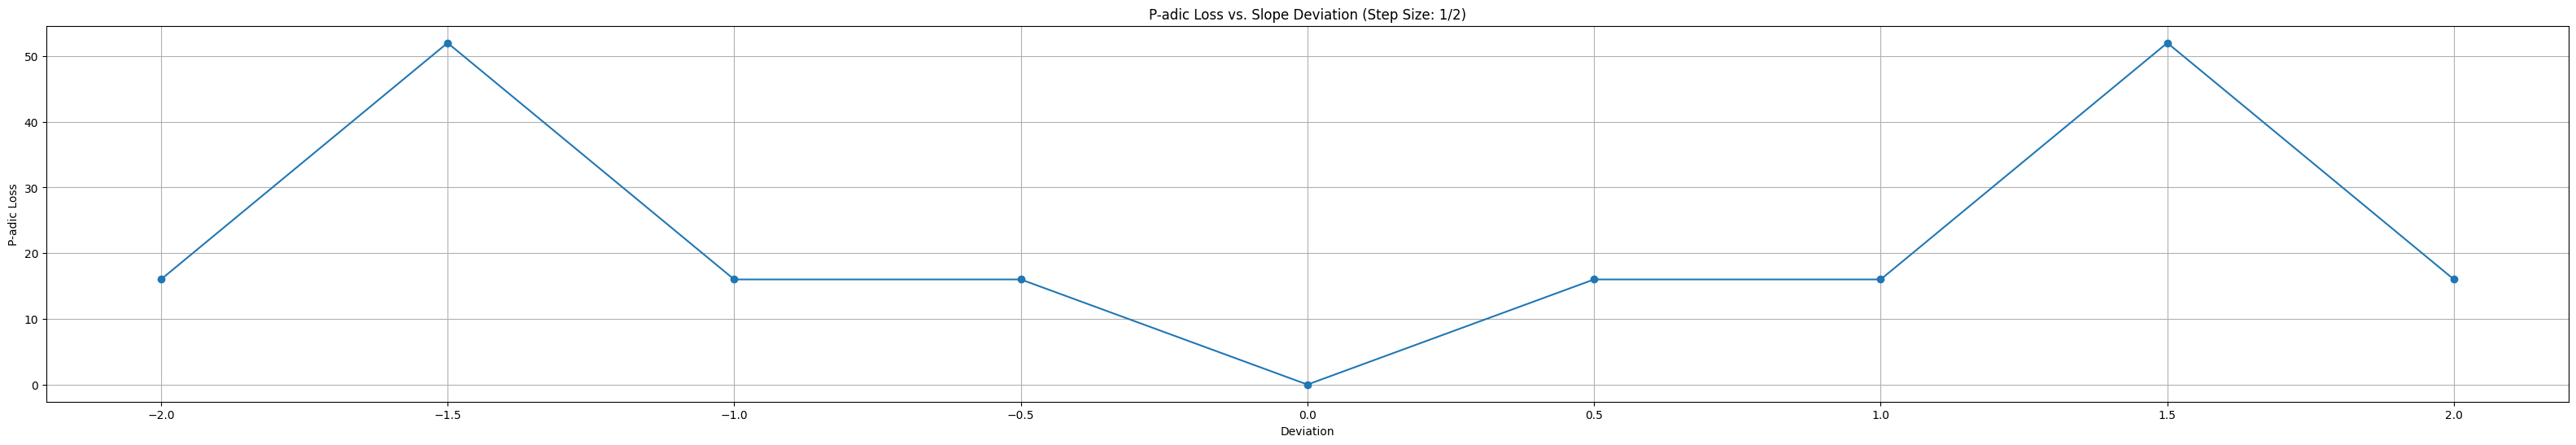

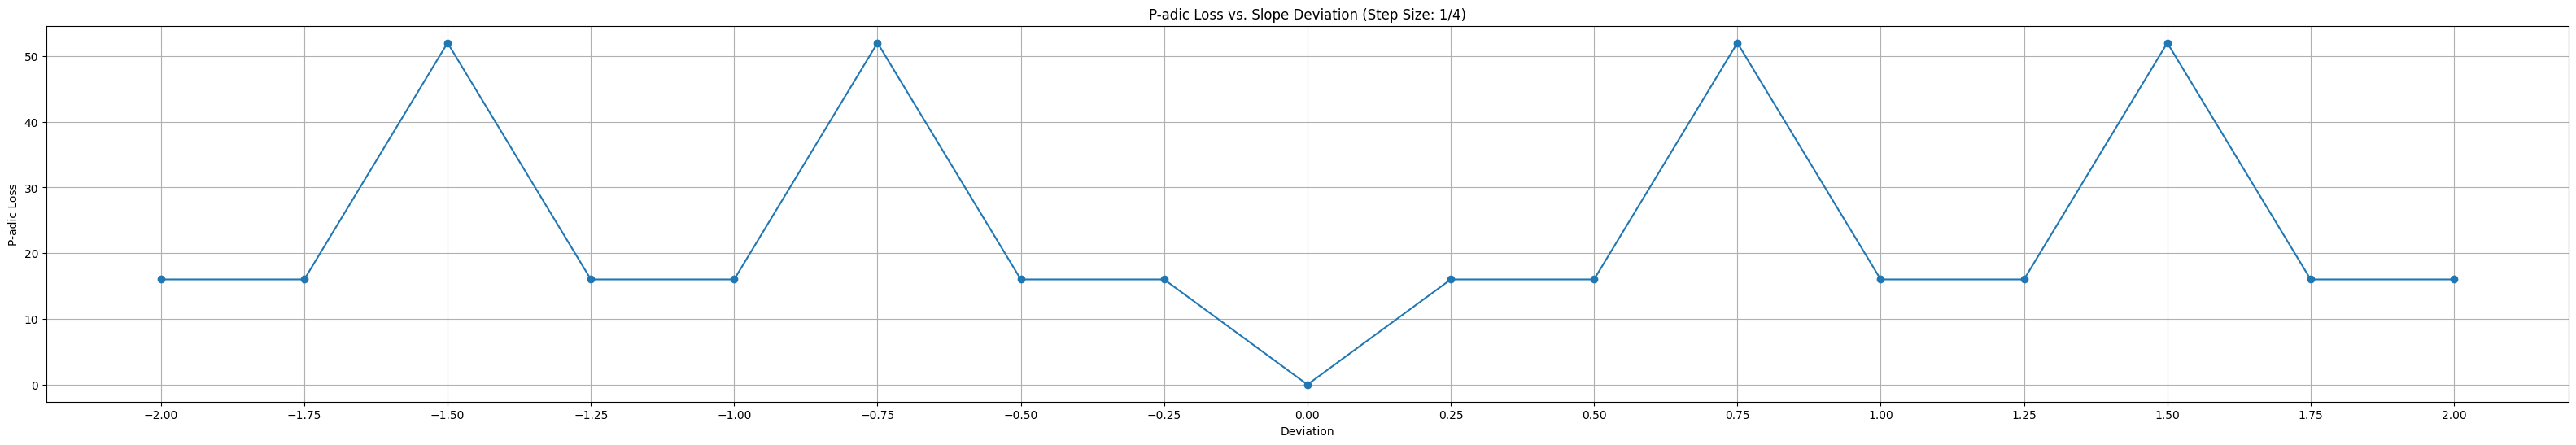

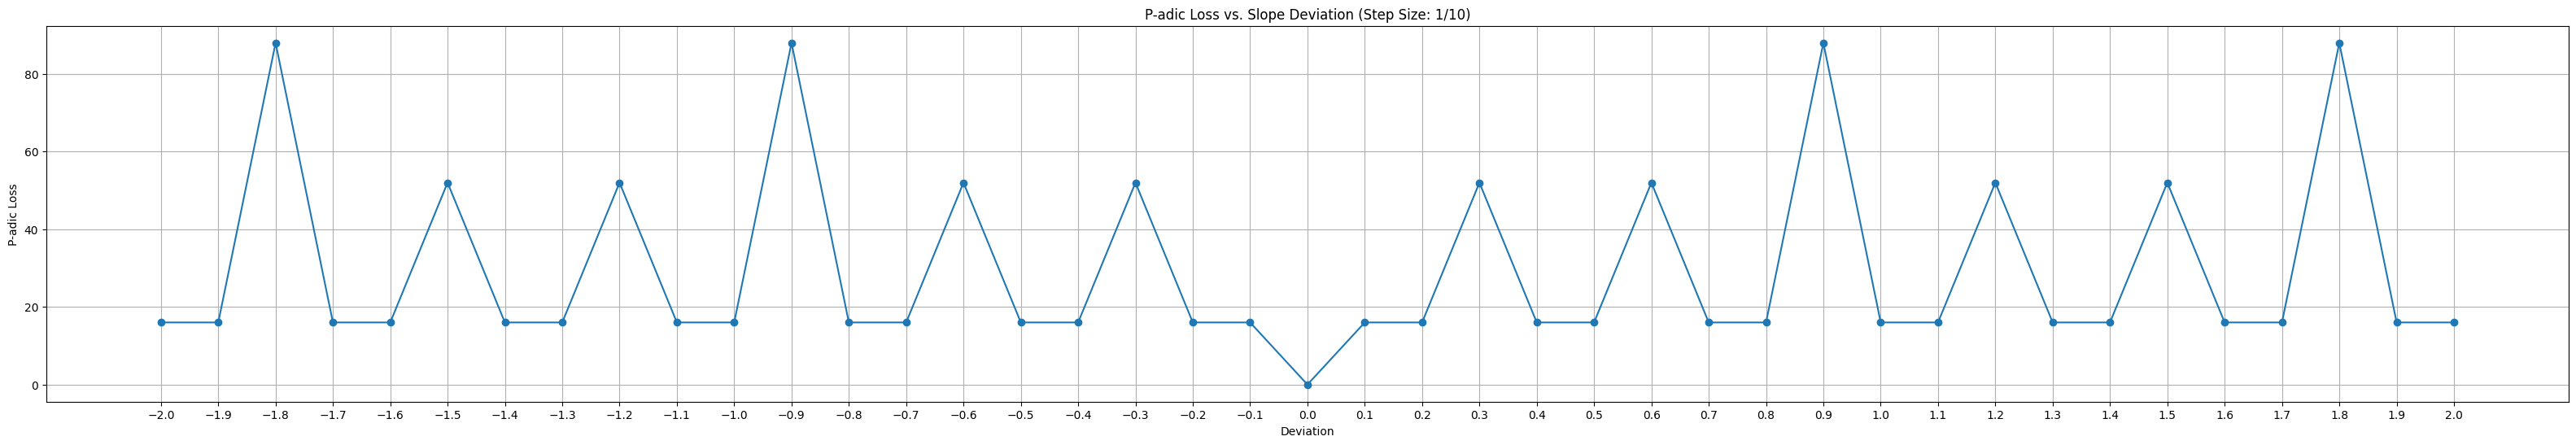

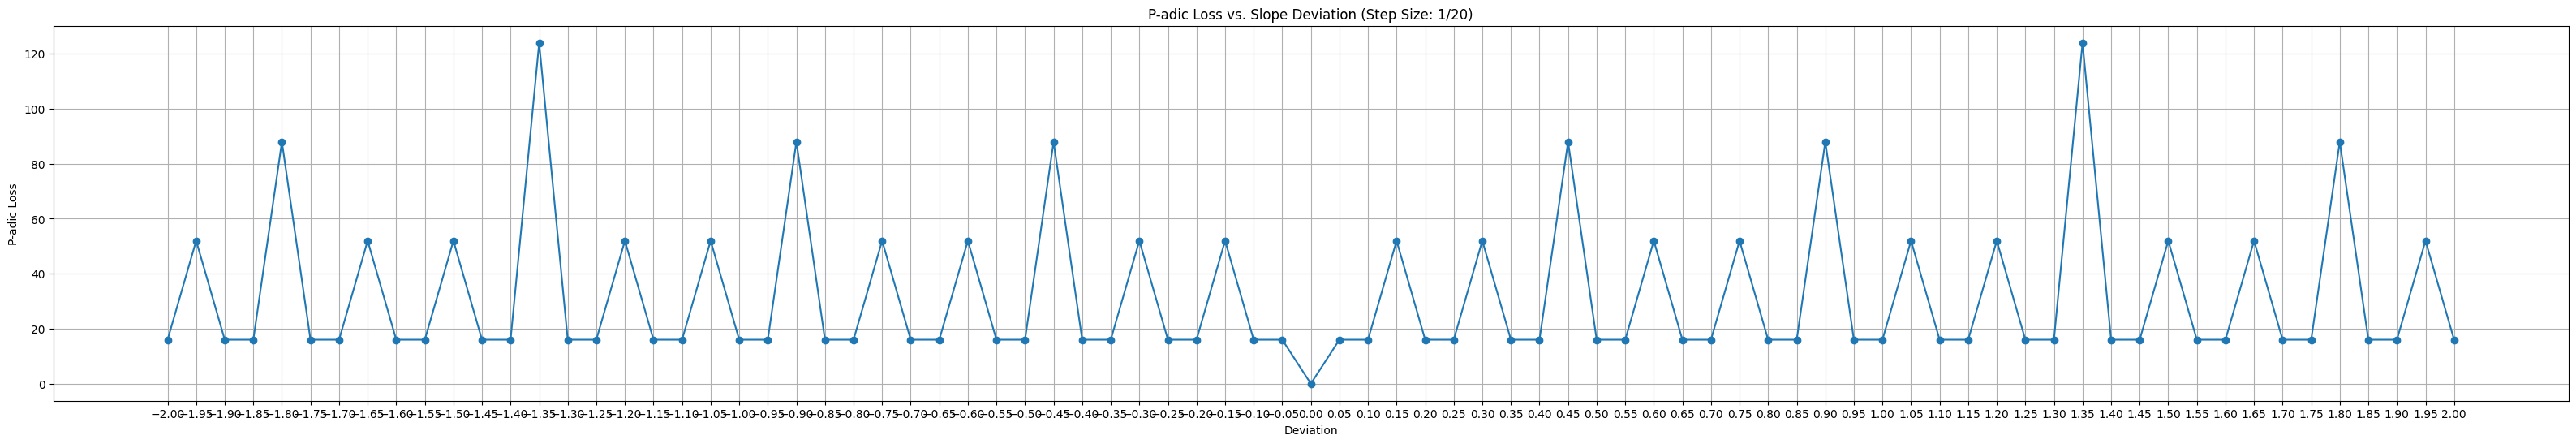

In [41]:
deviation_start = Rational(-2)
deviation_end = Rational(2)

# Loop through each deviation step size
for deviation_step in deviation_step_sizes:
    deviations_for_plot = []
    losses_for_plot = []

    current_deviation = deviation_start # defined in previous cells as Rational(-2)

    while current_deviation <= deviation_end: # defined in previous cells as Rational(2)
        deviations_for_plot.append(current_deviation)

        # Calculate deviated slope (Rational + Rational)
        slope_deviated = slope + current_deviation # slope and intercept are defined as Rational

        # Create V_deviated with Rational numbers, specify dtype=object
        V_deviated = np.array([[slope_deviated], [intercept]], dtype=object)

        # Calculate loss
        current_loss = loss(X, y, V_deviated, rows_total, p)
        losses_for_plot.append(current_loss)

        current_deviation += deviation_step

    # Convert Rational deviations and losses to floats for plotting
    numeric_deviations_for_plot = [float(dev) for dev in deviations_for_plot]
    numeric_losses_for_plot = [float(loss_val) for loss_val in losses_for_plot]

    # Plotting for the current deviation step size
    plt.figure(figsize=(40, 6))
    plt.plot(numeric_deviations_for_plot, numeric_losses_for_plot, marker='o', linestyle='-')
    plt.title(f'P-adic Loss vs. Slope Deviation (Step Size: {deviation_step})')
    plt.xlabel('Deviation')
    plt.ylabel('P-adic Loss')
    plt.grid(True)

    # Set x-ticks at a reasonable interval for fractional deviations
    # Need to convert Rational objects to floats for numpy.arange
    plt.xticks(np.arange(float(deviation_start), float(deviation_end) + float(deviation_step), float(deviation_step)))
    plt.show()

Plot saved: p_adic_loss_intercept_deviation_step_size_1_2.png


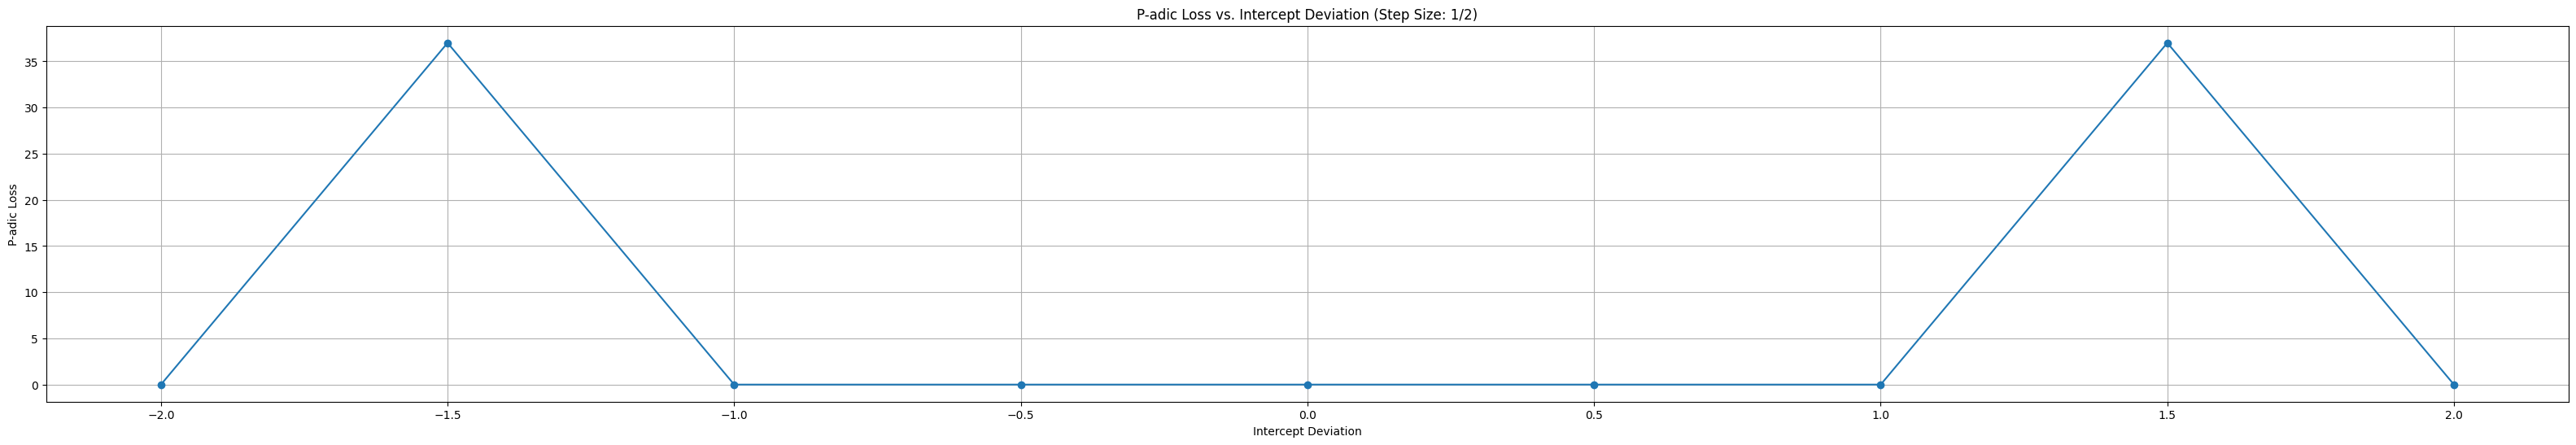

Plot saved: p_adic_loss_intercept_deviation_step_size_1_4.png


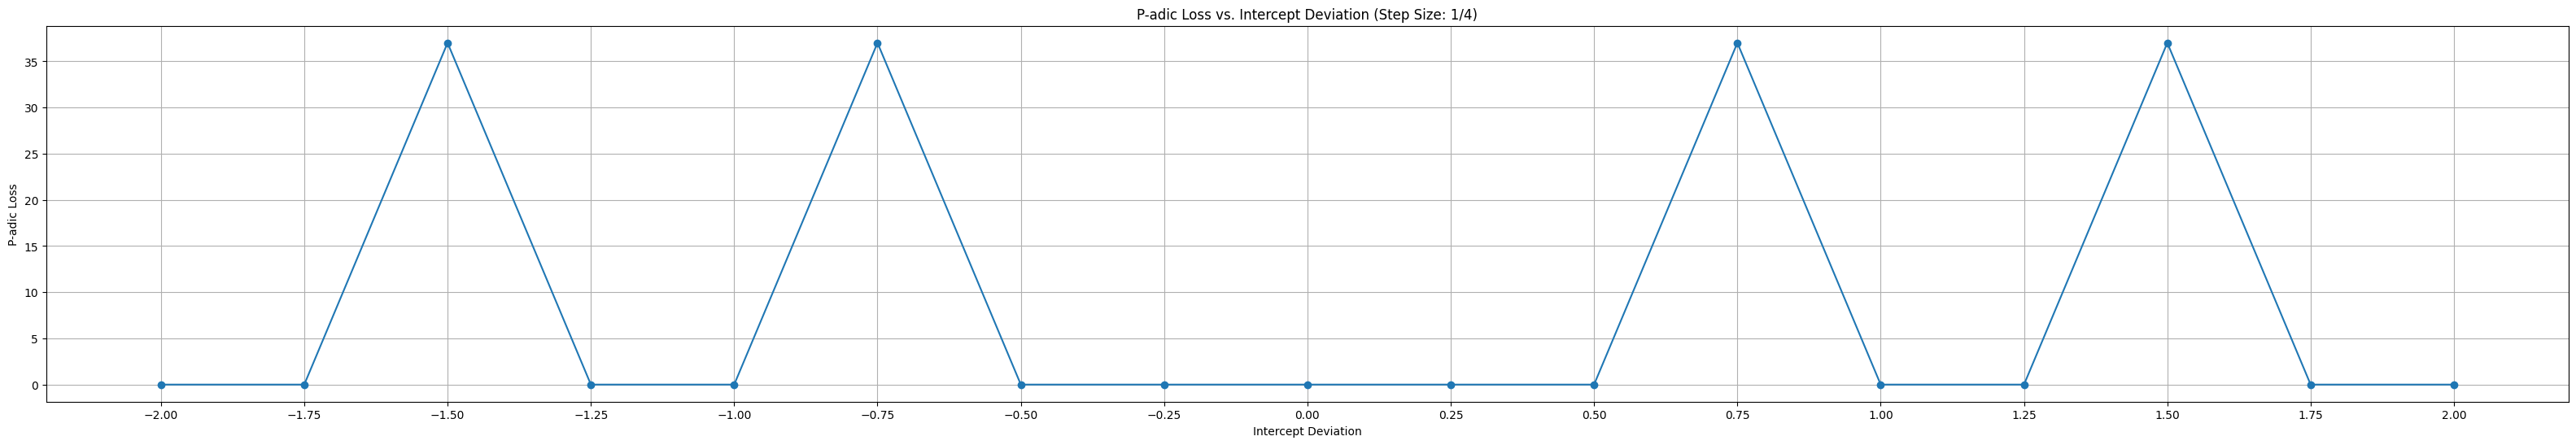

Plot saved: p_adic_loss_intercept_deviation_step_size_1_10.png


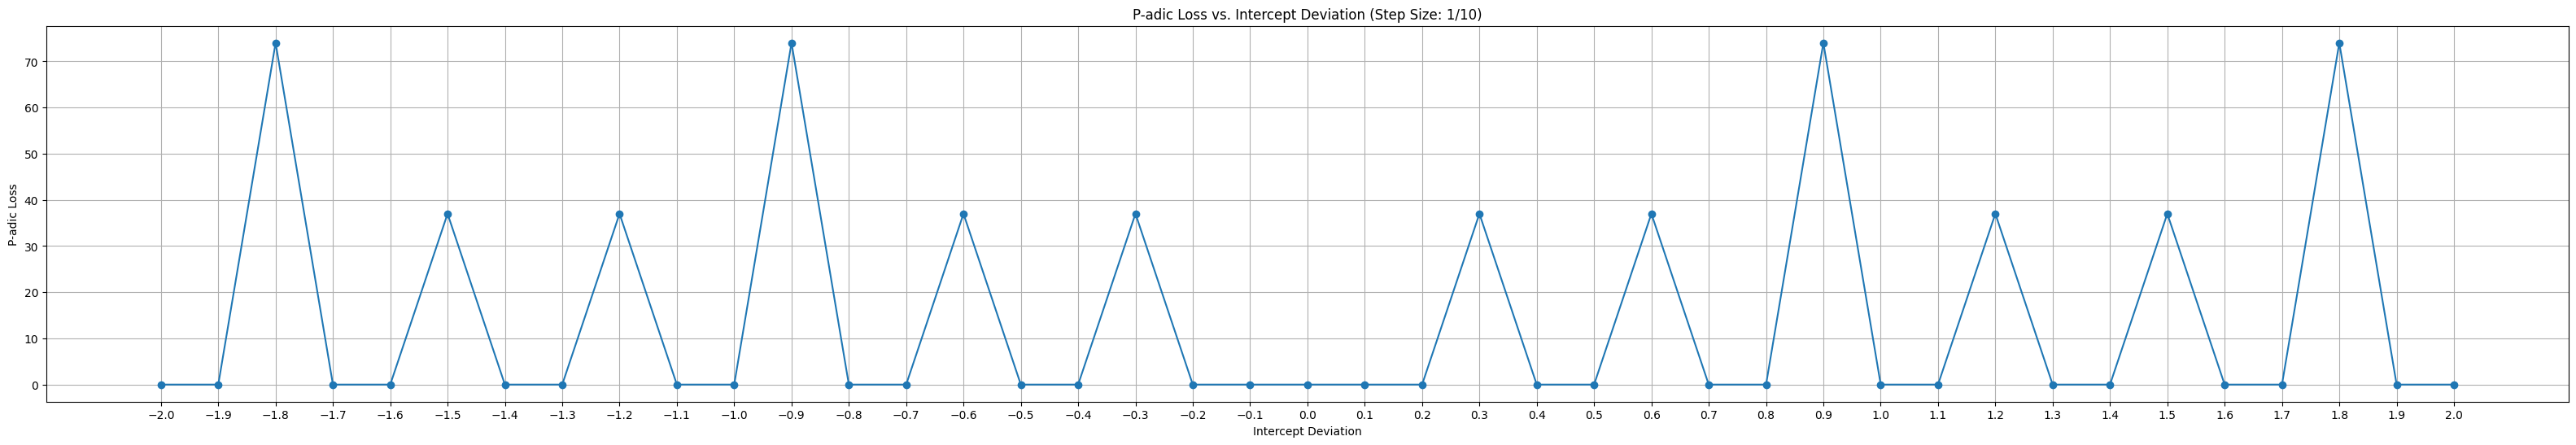

Plot saved: p_adic_loss_intercept_deviation_step_size_1_20.png


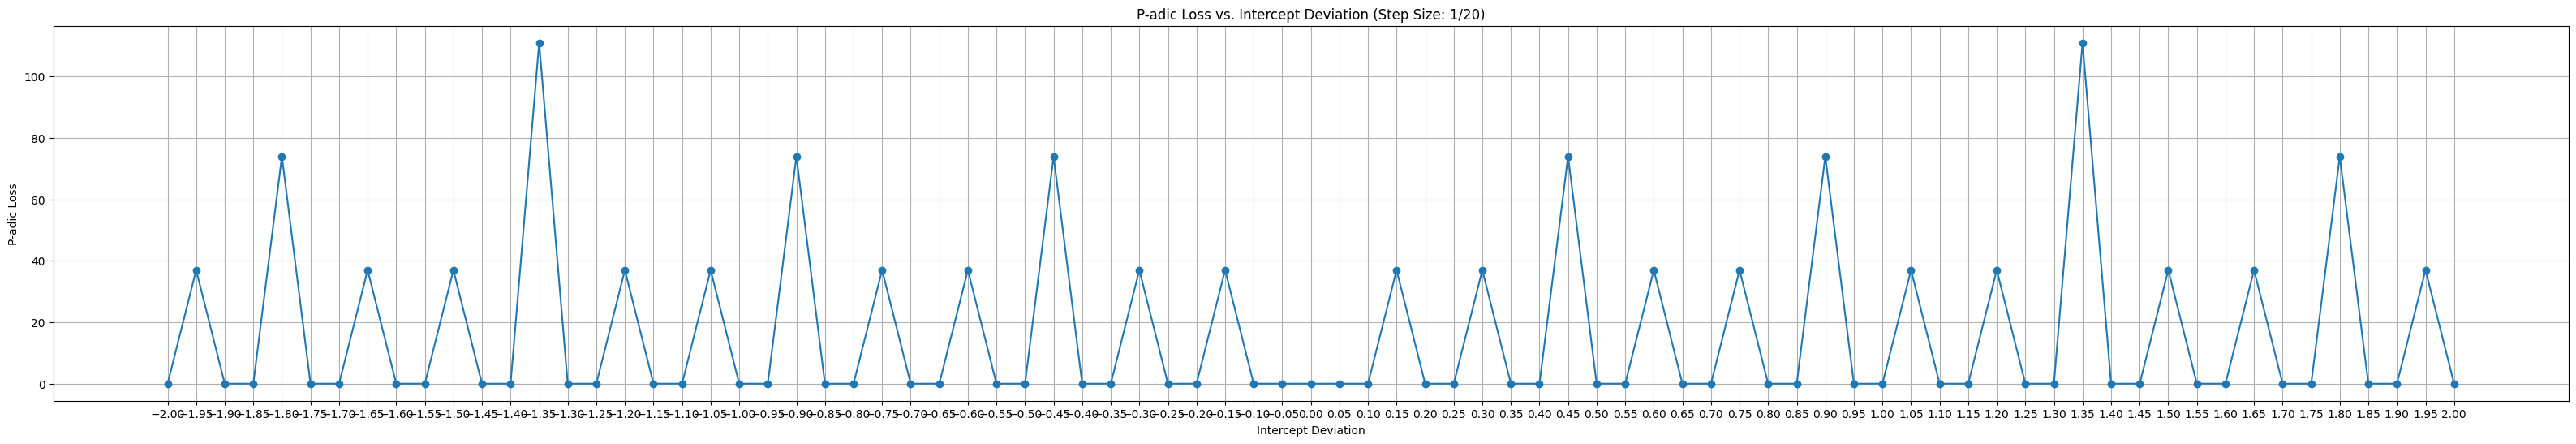

In [43]:

for deviation_step in deviation_step_sizes:
    deviations_for_plot = []
    losses_for_plot = []

    current_deviation = deviation_start

    while current_deviation <= deviation_end:
        deviations_for_plot.append(current_deviation)
        intercept_deviated = intercept + current_deviation
        V_deviated = np.array([[slope], [intercept_deviated]], dtype=object)
        current_loss = loss(X, y, V_deviated, rows_total, p)
        losses_for_plot.append(current_loss)
        current_deviation += deviation_step

    numeric_deviations_for_plot = [float(dev) for dev in deviations_for_plot]
    numeric_losses_for_plot = [float(loss_val) for loss_val in losses_for_plot]

    fig = plt.figure(figsize=(40, 6))
    plt.plot(numeric_deviations_for_plot, numeric_losses_for_plot, marker='o', linestyle='-')
    plt.title(f'P-adic Loss vs. Intercept Deviation (Step Size: {deviation_step})')
    plt.xlabel('Intercept Deviation')
    plt.ylabel('P-adic Loss')
    plt.grid(True)
    plt.xticks(np.arange(float(deviation_start), float(deviation_end) + float(deviation_step), float(deviation_step)))

    filename = f"p_adic_loss_intercept_deviation_step_size_{deviation_step.numerator}_{deviation_step.denominator}.png"
    plt.savefig(filename)
    print(f"Plot saved: {filename}")

    plt.show()
    plt.close(fig)